<a href="https://colab.research.google.com/github/RajwardhanRana/Data-Analytics/blob/main/Resume_IIM_Task_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#rana
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mounted at /content/drive


In [ ]:

df = pd.read_excel("/content/drive/My Drive/TCS Data.xlsx")
df

,rating,employtype,Discrip,DateDesignation,pros,cons,proscons
0,5.0,"Former Employee, more than 3 years",Great place to work,8 Jun 2023 - System Engineer,Employee benefits Onsite opportunities No work...,No Remote available Far away from usual city,Employee benefits Onsite opportunities No work...
1,1.0,"Current Employee, less than 1 year","Pathetic managers , poor work culture and envi...",8 Jun 2023 - Assistant system consultant,"Good health insurance scheme, Nothing else I h...","No team building exercise, managers are rude a...","Good health insurance scheme, Nothing else I h..."
2,4.0,Former Employee,System engineer,8 Jun 2023 - System Engineer,"Good, friendly environment. Focus on whole emp...",None from my the side.,"Good, friendly environment. Focus on whole emp..."
3,5.0,"Current Employee, less than 1 year",Review,8 Jun 2023 - Assistant Systems Engineer,Good company to work with,Nothing to say as con,Good company to work withNothing to say as con
4,4.0,Current Employee,Review over tcs,7 Jun 2023 - Systems Engineer,"Job security , work life balance",Very less pay and less hike,"Job security , work life balanceVery less pay ..."
...,...,...,...,...,...,...,...
85,3.0,"Current Employee, less than 1 year",good,2 Jun 2023 - Systems Engineer,good very much no issues,"bad not at all, very good","good very much no issuesbad not at all, very good"
86,5.0,"Former Employee, more than 3 years",NaN,2 Jun 2023 - System Engineer,"Job security, respectable base pay, benefits.",Poor growth in terms of pay and career.,"Job security, respectable base pay, benefits.P..."
87,3.0,Former Employee,Good,2 Jun 2023 - Technical Support Engineer,Nice place to work at.,Nothing null or no thing,Nice place to work at.Nothing null or no thing
88,3.0,"Former Employee, more than 3 years",Experience,2 Jun 2023 - Technology Consultant,Good for experienced individuals to come and s...,Not a good company to start with. Learning opp...,Good for experienced individuals to come and s...


In [ ]:
df['reviews'] = df['pros']+ " " +df['cons'] + " " + df['Discrip']
df = df[df['reviews'].isna()==False]

In [ ]:
df

,rating,employtype,Discrip,DateDesignation,pros,cons,proscons,reviews
0,5.0,"Former Employee, more than 3 years",Great place to work,8 Jun 2023 - System Engineer,Employee benefits Onsite opportunities No work...,No Remote available Far away from usual city,Employee benefits Onsite opportunities No work...,Employee benefits Onsite opportunities No work...
1,1.0,"Current Employee, less than 1 year","Pathetic managers , poor work culture and envi...",8 Jun 2023 - Assistant system consultant,"Good health insurance scheme, Nothing else I h...","No team building exercise, managers are rude a...","Good health insurance scheme, Nothing else I h...","Good health insurance scheme, Nothing else I h..."
2,4.0,Former Employee,System engineer,8 Jun 2023 - System Engineer,"Good, friendly environment. Focus on whole emp...",None from my the side.,"Good, friendly environment. Focus on whole emp...","Good, friendly environment. Focus on whole emp..."
3,5.0,"Current Employee, less than 1 year",Review,8 Jun 2023 - Assistant Systems Engineer,Good company to work with,Nothing to say as con,Good company to work withNothing to say as con,Good company to work with Nothing to say as co...
4,4.0,Current Employee,Review over tcs,7 Jun 2023 - Systems Engineer,"Job security , work life balance",Very less pay and less hike,"Job security , work life balanceVery less pay ...","Job security , work life balance Very less pay..."
...,...,...,...,...,...,...,...,...
84,5.0,"Current Employee, less than 1 year",Systems engineer,2 Jun 2023 - Systems Engineer,Nice great company to work,Good nice better best great,Nice great company to workGood nice better bes...,Nice great company to work Good nice better be...
85,3.0,"Current Employee, less than 1 year",good,2 Jun 2023 - Systems Engineer,good very much no issues,"bad not at all, very good","good very much no issuesbad not at all, very good","good very much no issues bad not at all, very ..."
87,3.0,Former Employee,Good,2 Jun 2023 - Technical Support Engineer,Nice place to work at.,Nothing null or no thing,Nice place to work at.Nothing null or no thing,Nice place to work at. Nothing null or no thin...
88,3.0,"Former Employee, more than 3 years",Experience,2 Jun 2023 - Technology Consultant,Good for experienced individuals to come and s...,Not a good company to start with. Learning opp...,Good for experienced individuals to come and s...,Good for experienced individuals to come and s...


In [ ]:
df['polarity'] = df['reviews'].apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df['reviews'].apply(lambda x: TextBlob(x).subjectivity)
df['level'] = df['polarity'].apply(lambda x:  "positive" if x>=0.2 else ( "negative" if x<=0 else "neutral"))
df[['reviews', 'polarity', 'subjective', 'level']]
#df.to_excel('data.xlsx',index=False)

<ipython-input-27-57e3af618ad2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['reviews'].apply(lambda x: TextBlob(x).polarity)
<ipython-input-27-57e3af618ad2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjective'] = df['reviews'].apply(lambda x: TextBlob(x).subjectivity)
<ipython-input-27-57e3af618ad2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,reviews,polarity,subjective,level
0,Employee benefits Onsite opportunities No work...,0.220000,0.520000,positive
1,"Good health insurance scheme, Nothing else I h...",-0.185714,0.642857,negative
2,"Good, friendly environment. Focus on whole emp...",0.425000,0.500000,positive
3,Good company to work with Nothing to say as co...,0.700000,0.600000,positive
4,"Job security , work life balance Very less pay...",-0.191667,0.076667,negative
...,...,...,...,...
84,Nice great company to work Good nice better be...,0.714286,0.700000,positive
85,"good very much no issues bad not at all, very ...",0.374000,0.581333,positive
87,Nice place to work at. Nothing null or no thin...,0.650000,0.800000,positive
88,Good for experienced individuals to come and s...,0.205556,0.486111,positive


In [ ]:
df['level'].value_counts()

positive    65
neutral     12
negative    11
Name: level, dtype: int64

In [ ]:
stop = stopwords.words('english')
df['new_reviews'] = df['reviews'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df[['new_reviews']]

<ipython-input-17-b5f5c0a94de6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_reviews'] = df['reviews'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))


,new_reviews
0,Employee benefits Onsite opportunities No work...
1,"Good health insurance scheme, Nothing else I f..."
2,"Good, friendly environment. Focus whole employ..."
3,Good company work Nothing say con Review
4,"Job security , work life balance Very less pay..."
...,...
84,Nice great company work Good nice better best ...
85,"good much issues bad all, good good"
87,Nice place work at. Nothing null thing Good
88,Good experienced individuals come settle. Onsi...


In [ ]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)

positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)

In [ ]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
#   print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
for text in df[df.level=="positive"].new_reviews:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

for text in df[df.level=="negative"].new_reviews:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

for text in df[df.level=="neutral"].new_reviews:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

In [ ]:
for text in df[df.level=="positive"].new_reviews:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

for text in df[df.level=="negative"].new_reviews:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

for text in df[df.level=="neutral"].new_reviews:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

In [ ]:
for text in df[df.level=="positive"].new_reviews:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

for text in df[df.level=="negative"].new_reviews:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

for text in df[df.level=="neutral"].new_reviews:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

In [ ]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

df_positive2.to_excel('positivewords.xlsx',index=False)
df_negative2.to_excel('negativewords.xlsx',index=False)
df_neutral2.to_excel('neutralwords.xlsx',index=False)

In [ ]:
top_n = 30

pd1=df_positive[0][:top_n]#words
pd2=df_positive[1][:top_n]#freq

ned1=df_negative[0][:top_n]
ned2=df_negative[1][:top_n]

nud1=df_neutral[0][:top_n]
nud2=df_neutral[1][:top_n]




pd1bi=df_positive2[0][:top_n]
pd2bi=df_positive2[1][:top_n]

ned1bi=df_negative2[0][:top_n]
ned2bi=df_negative2[1][:top_n]

nud1bi=df_neutral2[0][:top_n]
nud2bi=df_neutral2[1][:top_n]




pd1tri=df_positive3[0][:top_n]
pd2tri=df_positive3[1][:top_n]

ned1tri=df_negative3[0][:top_n]
ned2tri=df_negative3[1][:top_n]

nud1tri=df_neutral3[0][:top_n]
nud2tri=df_neutral3[1][:top_n]

pd1, ned1, pd1bi, ned1bi, pd1tri, ned1tri

(0         Good
 1         work
 2         good
 3         life
 4      balance
 5      company
 6         Work
 7           No
 8        place
 9          job
 10      salary
 11       Great
 12    security
 13        Nice
 14    learning
 15     Nothing
 16        less
 17     project
 18        cons
 19         low
 20         per
 21         Low
 22     fresher
 23       great
 24         Not
 25        Less
 26    pressure
 27        Very
 28      growth
 29      Salary
 Name: 0, dtype: object,
 0               ->
 1             Good
 2               No
 3      environment
 4              Job
 5             less
 6             work
 7          project
 8             good
 9                ,
 10            life
 11    compensation
 12         company
 13            else
 14            team
 15        managers
 16         culture
 17        security
 18         balance
 19            Very
 20          growth
 21       stability
 22         working
 23           chill
 24            

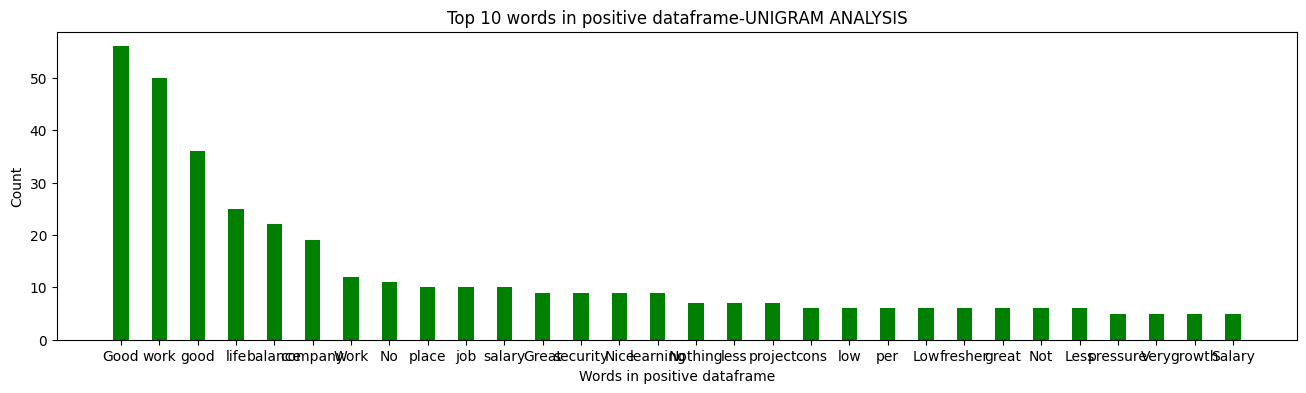

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

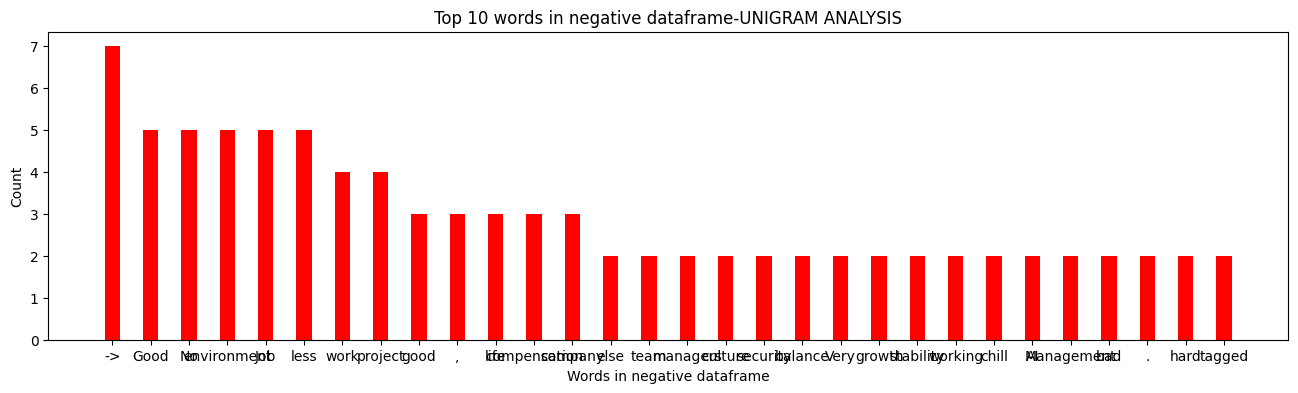

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

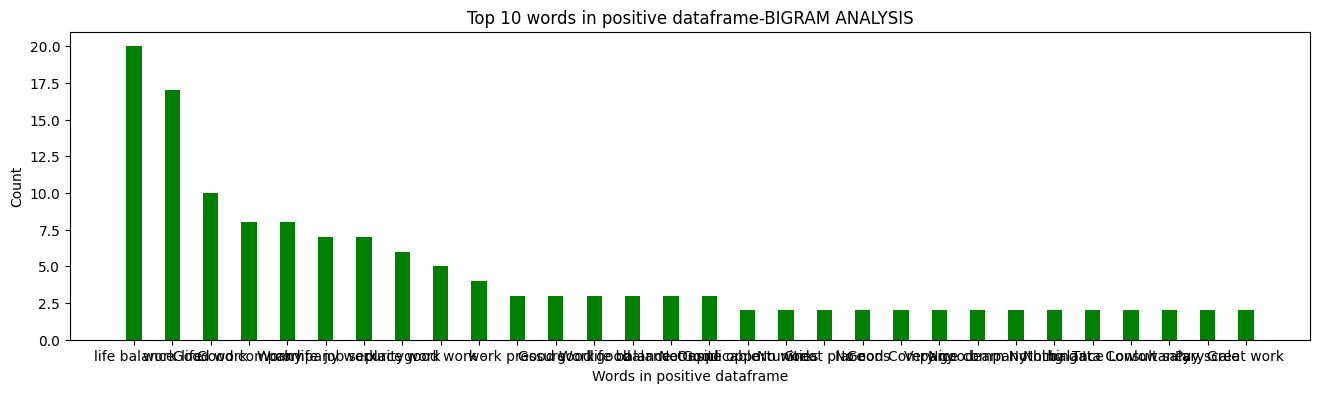

In [ ]:
#BIGRAMS
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

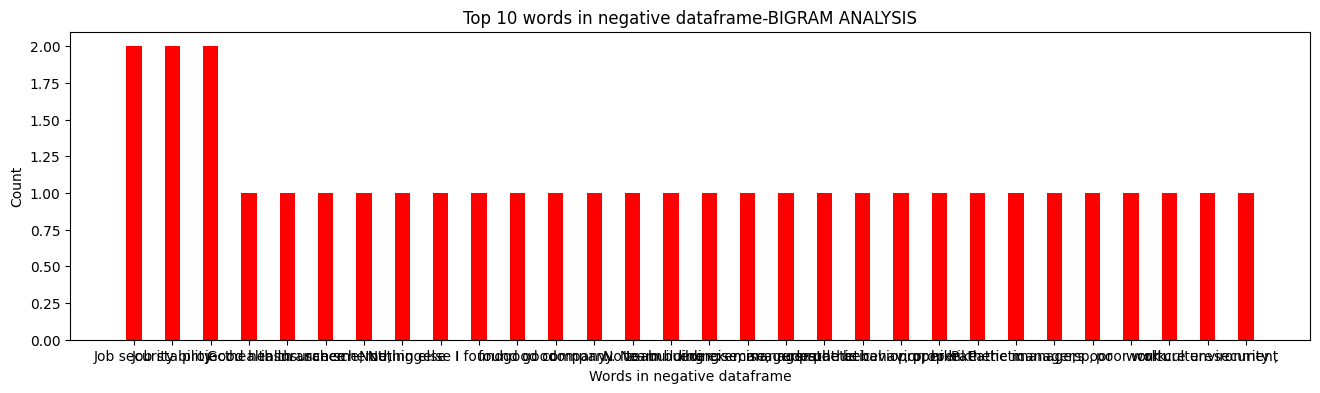

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

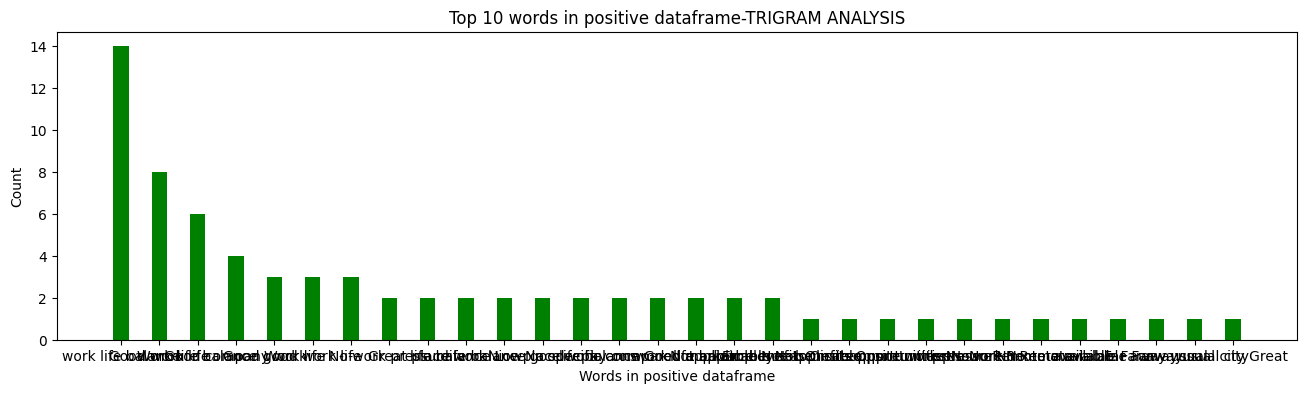

In [ ]:
#TRI GRAMS
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

plt.savefig("positive-trigram.png")

plt.show()

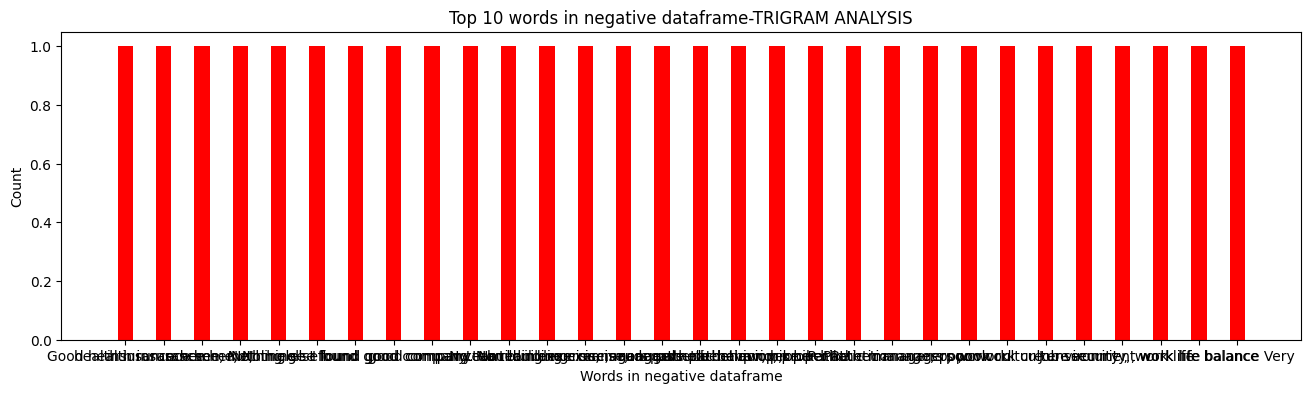

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()